In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data= pd.read_csv('ecoli.csv')

In [3]:
data

,SEQUENCE_NAME,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SEQUENCE_NAME  336 non-null    object 
 1   MCG            336 non-null    float64
 2   GVH            336 non-null    float64
 3   LIP            336 non-null    float64
 4   CHG            336 non-null    float64
 5   AAC            336 non-null    float64
 6   ALM1           336 non-null    float64
 7   ALM2           336 non-null    float64
 8   SITE           336 non-null    object 
dtypes: float64(7), object(2)
memory usage: 23.8+ KB


In [5]:
data.isna().sum()

SEQUENCE_NAME    0
MCG              0
GVH              0
LIP              0
CHG              0
AAC              0
ALM1             0
ALM2             0
SITE             0
dtype: int64

In [6]:
data.shape

(336, 9)

In [7]:
data['SITE'].unique()

array(['cp', 'im', 'imS', 'imL', 'imU', 'om', 'omL', 'pp'], dtype=object)

In [8]:
data['SITE'].value_counts()

cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: SITE, dtype: int64

In [9]:
data['SITE'].value_counts().sum()

336

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
def preprocessing_inputs(df):
    df = df.copy()
    # drop SEQUENCE_NAME
    df = df.drop(['SEQUENCE_NAME'], axis = 'columns')
    # target columns are modify
    #df['SITE'] = df['SITE'].apply(lambda x : x if x=='cp' else 'other')
    # or
    df['SITE'] = df['SITE'].apply(lambda x : 1 if x=='cp' else 0)
    # split df intoX,y
    y = df['SITE']
    X = df.drop(['SITE'],axis = 'columns')
    # train  df
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
    # scale X,y
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train),index =X_train.index,columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test),index= X_test.index,columns = X_test.columns)
    return X_train,X_test,y_train,y_test

In [12]:
X_train,X_test,y_train,y_test = preprocessing_inputs(data)

In [13]:
X_train

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
313,0.956772,1.168210,-0.175412,-0.061199,-1.610442,-0.497103,-1.262975
152,-1.122829,-0.173754,-0.175412,-0.061199,1.652009,0.727725,0.944805
25,-1.122829,-0.844736,-0.175412,-0.061199,-0.178146,-0.261559,0.110755
95,0.696821,1.772094,-0.175412,-0.061199,-0.416862,-0.685538,-0.576110
299,0.904782,2.174683,-0.175412,-0.061199,-0.973866,0.727725,0.307002
...,...,...,...,...,...,...,...
196,0.020951,-0.643442,-0.175412,-0.061199,0.538002,0.586399,0.846682
58,-0.342979,-1.046031,-0.175412,-0.061199,-1.610442,-0.779756,-0.330801
69,-0.810889,-0.106656,-0.175412,-0.061199,0.458430,-0.449994,-0.085492
115,-0.498949,0.094639,-0.175412,-0.061199,0.617573,-1.392170,-0.919542


In [14]:
X_train.describe()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
count,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02
mean,2.705133e-16,5.795530e-16,-1.062790e-15,-1.157397e-15,5.216598e-16,-2.986831e-16,-1.429205e-16
std,1.001871e+00,1.001871e+00,1.001871e+00,1.001871e+00,1.001871e+00,1.001871e+00,1.001871e+00
min,-2.630540e+00,-2.253799e+00,-1.754116e-01,-6.119901e-02,-3.997601e+00,-2.193019e+00,-2.440457e+00
25%,-8.628792e-01,-6.602164e-01,-1.754116e-01,-6.119901e-02,-6.555780e-01,-7.797556e-01,-7.232951e-01
50%,2.095120e-02,-1.737543e-01,-1.754116e-01,-6.119901e-02,-1.900226e-02,-1.908960e-01,-3.308009e-01
75%,8.527915e-01,4.972278e-01,-1.754116e-01,-6.119901e-02,5.380015e-01,9.632689e-01,9.938671e-01
max,1.996572e+00,3.382451e+00,5.700877e+00,1.634013e+01,3.004733e+00,2.376532e+00,2.416659e+00


In [15]:
X_test

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
214,-2.630540,0.094639,-0.175412,-0.061199,-1.212582,0.821943,-0.281739
207,-2.058650,0.027540,-0.175412,-0.061199,0.617573,1.057486,0.895744
195,0.436871,0.430130,-0.175412,-0.061199,0.378858,1.434357,1.582608
169,-0.083029,-0.509245,-0.175412,-0.061199,0.219714,1.387248,1.533547
146,-1.434769,-0.106656,-0.175412,-0.061199,0.697145,1.811227,1.926041
...,...,...,...,...,...,...,...
79,-1.122829,-0.576344,-0.175412,-0.061199,-0.178146,-0.544212,-0.183616
60,-0.342979,0.430130,-0.175412,-0.061199,-0.019002,-0.167342,0.208879
309,0.696821,2.308879,-0.175412,-0.061199,-1.053438,-0.214450,-0.477986
54,-0.187009,-0.173754,-0.175412,-0.061199,-2.247017,-1.580605,-1.164851


In [16]:

y_train

313    0
152    0
25     1
95     1
299    0
      ..
196    0
58     1
69     1
115    1
108    1
Name: SITE, Length: 268, dtype: int64

In [17]:
y_test

214    0
207    0
195    0
169    0
146    0
      ..
79     1
60     1
309    0
54     1
245    0
Name: SITE, Length: 68, dtype: int64

In [18]:
X_train.describe()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
count,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02
mean,2.705133e-16,5.795530e-16,-1.062790e-15,-1.157397e-15,5.216598e-16,-2.986831e-16,-1.429205e-16
std,1.001871e+00,1.001871e+00,1.001871e+00,1.001871e+00,1.001871e+00,1.001871e+00,1.001871e+00
min,-2.630540e+00,-2.253799e+00,-1.754116e-01,-6.119901e-02,-3.997601e+00,-2.193019e+00,-2.440457e+00
25%,-8.628792e-01,-6.602164e-01,-1.754116e-01,-6.119901e-02,-6.555780e-01,-7.797556e-01,-7.232951e-01
50%,2.095120e-02,-1.737543e-01,-1.754116e-01,-6.119901e-02,-1.900226e-02,-1.908960e-01,-3.308009e-01
75%,8.527915e-01,4.972278e-01,-1.754116e-01,-6.119901e-02,5.380015e-01,9.632689e-01,9.938671e-01
max,1.996572e+00,3.382451e+00,5.700877e+00,1.634013e+01,3.004733e+00,2.376532e+00,2.416659e+00


In [19]:
X_test.describe()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2
count,68.000000,68.000000,68.000000,6.800000e+01,68.000000,68.000000,68.000000
mean,-0.151839,0.136082,-0.002580,-6.119901e-02,-0.092723,0.108383,0.055921
std,1.049318,0.962414,1.000226,9.786679e-17,0.856831,1.074993,1.129281
min,-2.630540,-1.582817,-0.175412,-6.119901e-02,-2.247017,-1.580605,-1.704531
25%,-0.966859,-0.576344,-0.175412,-6.119901e-02,-0.655578,-0.779756,-0.821419
50%,-0.187009,0.027540,-0.175412,-6.119901e-02,-0.138360,-0.190896,-0.355332
75%,0.657829,0.631424,-0.175412,-6.119901e-02,0.398751,1.210590,1.349565
max,1.840602,2.308879,5.700877,-6.119901e-02,2.606873,1.952553,2.073226


In [20]:
#{column : len(X[column].unique()) for column  in X.columns}

In [21]:
from sklearn.linear_model import LogisticRegression
rog = LogisticRegression()

In [22]:
rog.fit(X_train,y_train)

LogisticRegression()

In [23]:
rog.score(X_test,y_test)

0.9411764705882353

In [24]:
rog.classes_

array([0, 1], dtype=int64)

In [25]:
y_pred= rog.predict(X_test)

In [26]:
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [28]:
cm


array([[42,  3],
       [ 1, 22]], dtype=int64)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sn


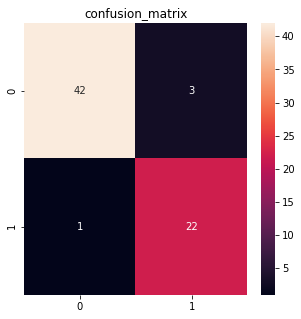

In [30]:
plt.figure(figsize = (5,5))
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion_matrix')
sn.heatmap(cm,annot = True)
plt.xticks(np.arange(2) + 0.5,rog.classes_)
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


In [32]:
models = {
                      
                    
                          
    "Support Vector Machine (Linear Kernel)": SVC(),
   # " DecisionTreeClassifie "                : DecisionTreeClassifier(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     GNB "             : GaussianNB(),
   # '                     MNB '             : MultinomialNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Support Vector Machine (Linear Kernel) trained.
                         Decision Tree trained.
                         Random Forest trained.
                     GNB  trained.


In [33]:
for name,model in models.items():
    print(name + 'Accuracy : {:.2f}'.format(model.score(X_test,y_test)))
    

Support Vector Machine (Linear Kernel)Accuracy : 0.96
                         Decision TreeAccuracy : 0.67
                         Random ForestAccuracy : 0.87
                     GNB Accuracy : 0.49


In [34]:
rog.classes_

array([0, 1], dtype=int64)